# Customer Churn Analysis

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Data
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Replacing the blank values in TotalCharges with 0
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


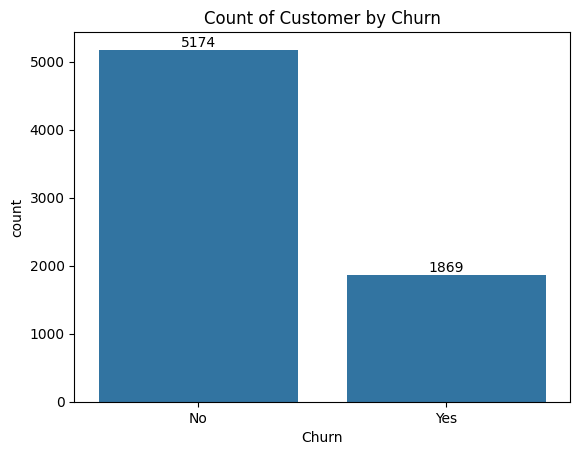

In [9]:
ax = sns.countplot(x='Churn', data=df)
plt.title('Count of Customer by Churn')
ax.bar_label(ax.containers[0])
plt.show()

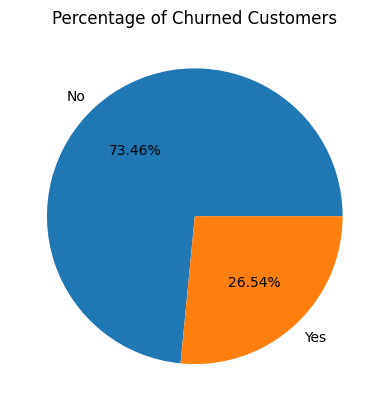

In [10]:
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title('Percentage of Churned Customers')
plt.show() 

### From the given pie chart we can conclude that 26.54% of our customers have churn out.
### Now let's explore the reason behind it.

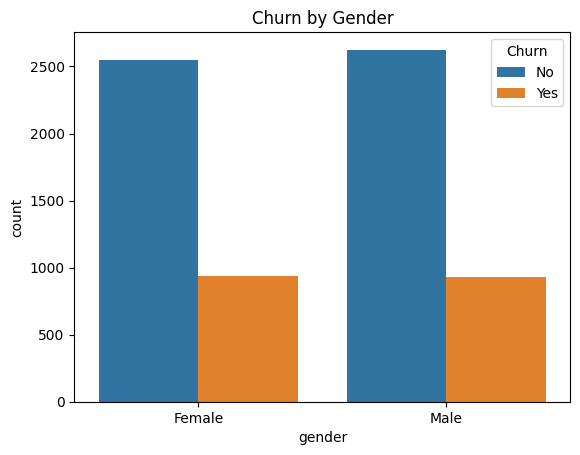

In [11]:
sns.countplot(x='gender', data=df,hue='Churn')
plt.title('Churn by Gender')
plt.show()

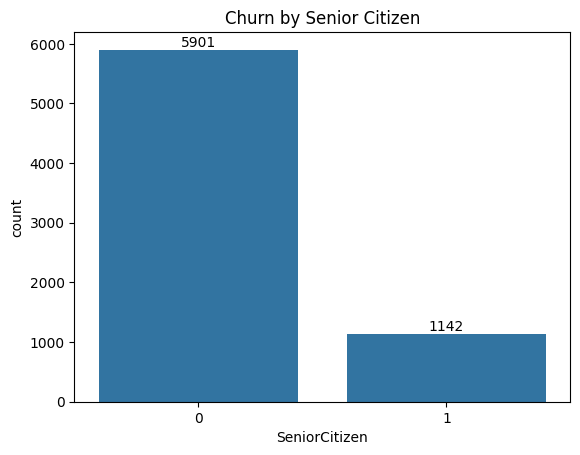

In [12]:
ax = sns.countplot(x='SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.title('Churn by Senior Citizen')
plt.show()

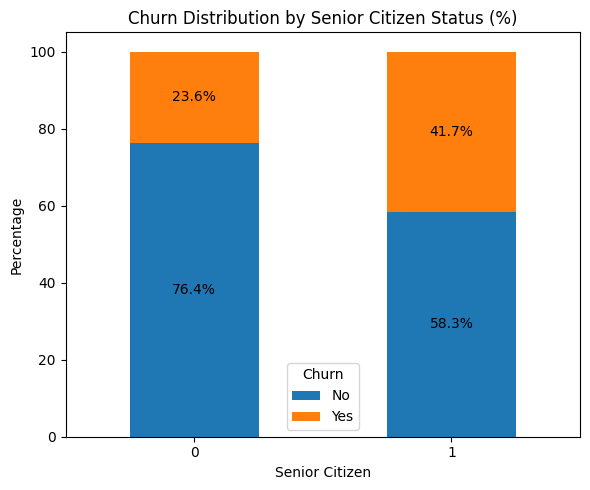

In [13]:
# Calculate percentages
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Create stacked bar plot
ax = senior_churn.plot(kind='bar', stacked=True, figsize=(6, 5))

# Add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.title('Churn Distribution by Senior Citizen Status (%)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Comparative a grater percentage of people in senior citizen category have churned.

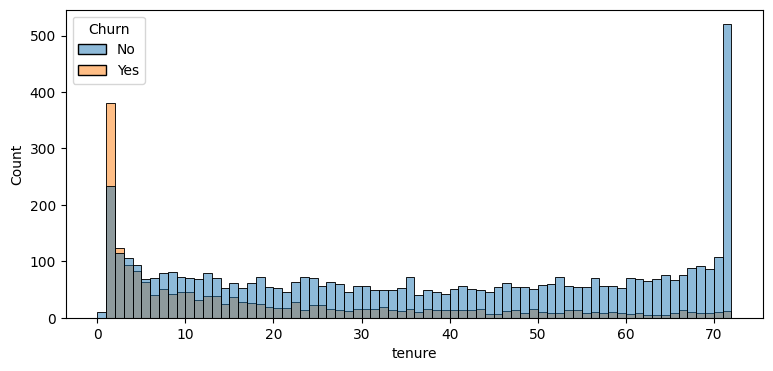

In [14]:
plt.figure(figsize=(9, 4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.show()

### People who have used our sevices for a long time have stayed and people who have used our services #1 or #2 months have churned.

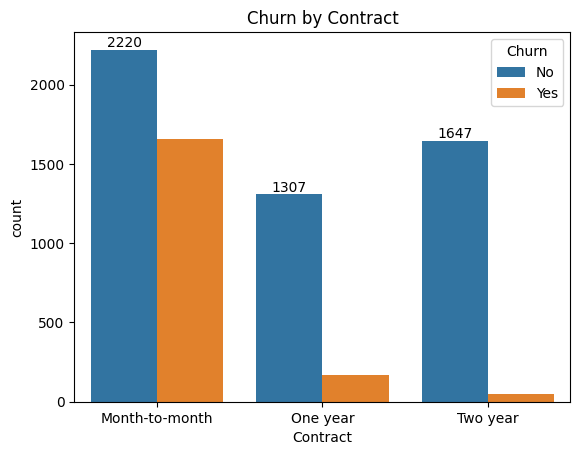

In [15]:
ax = sns.countplot(x='Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Churn by Contract')
plt.show()

### That people who have month to month contract are lickly to churn then from those who have 1 or 2 years of contract.

In [16]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

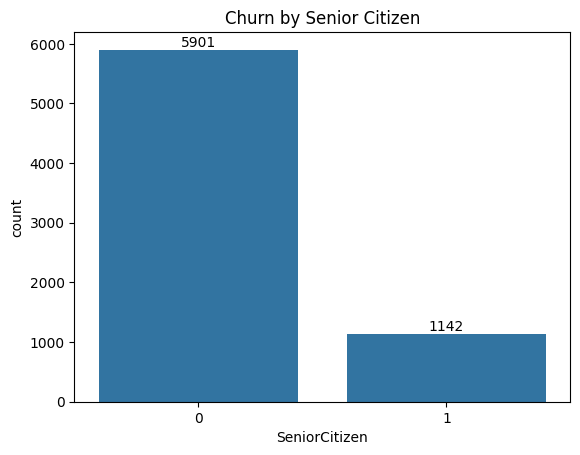

In [17]:
ax = sns.countplot(x='SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.title('Churn by Senior Citizen')
plt.show()

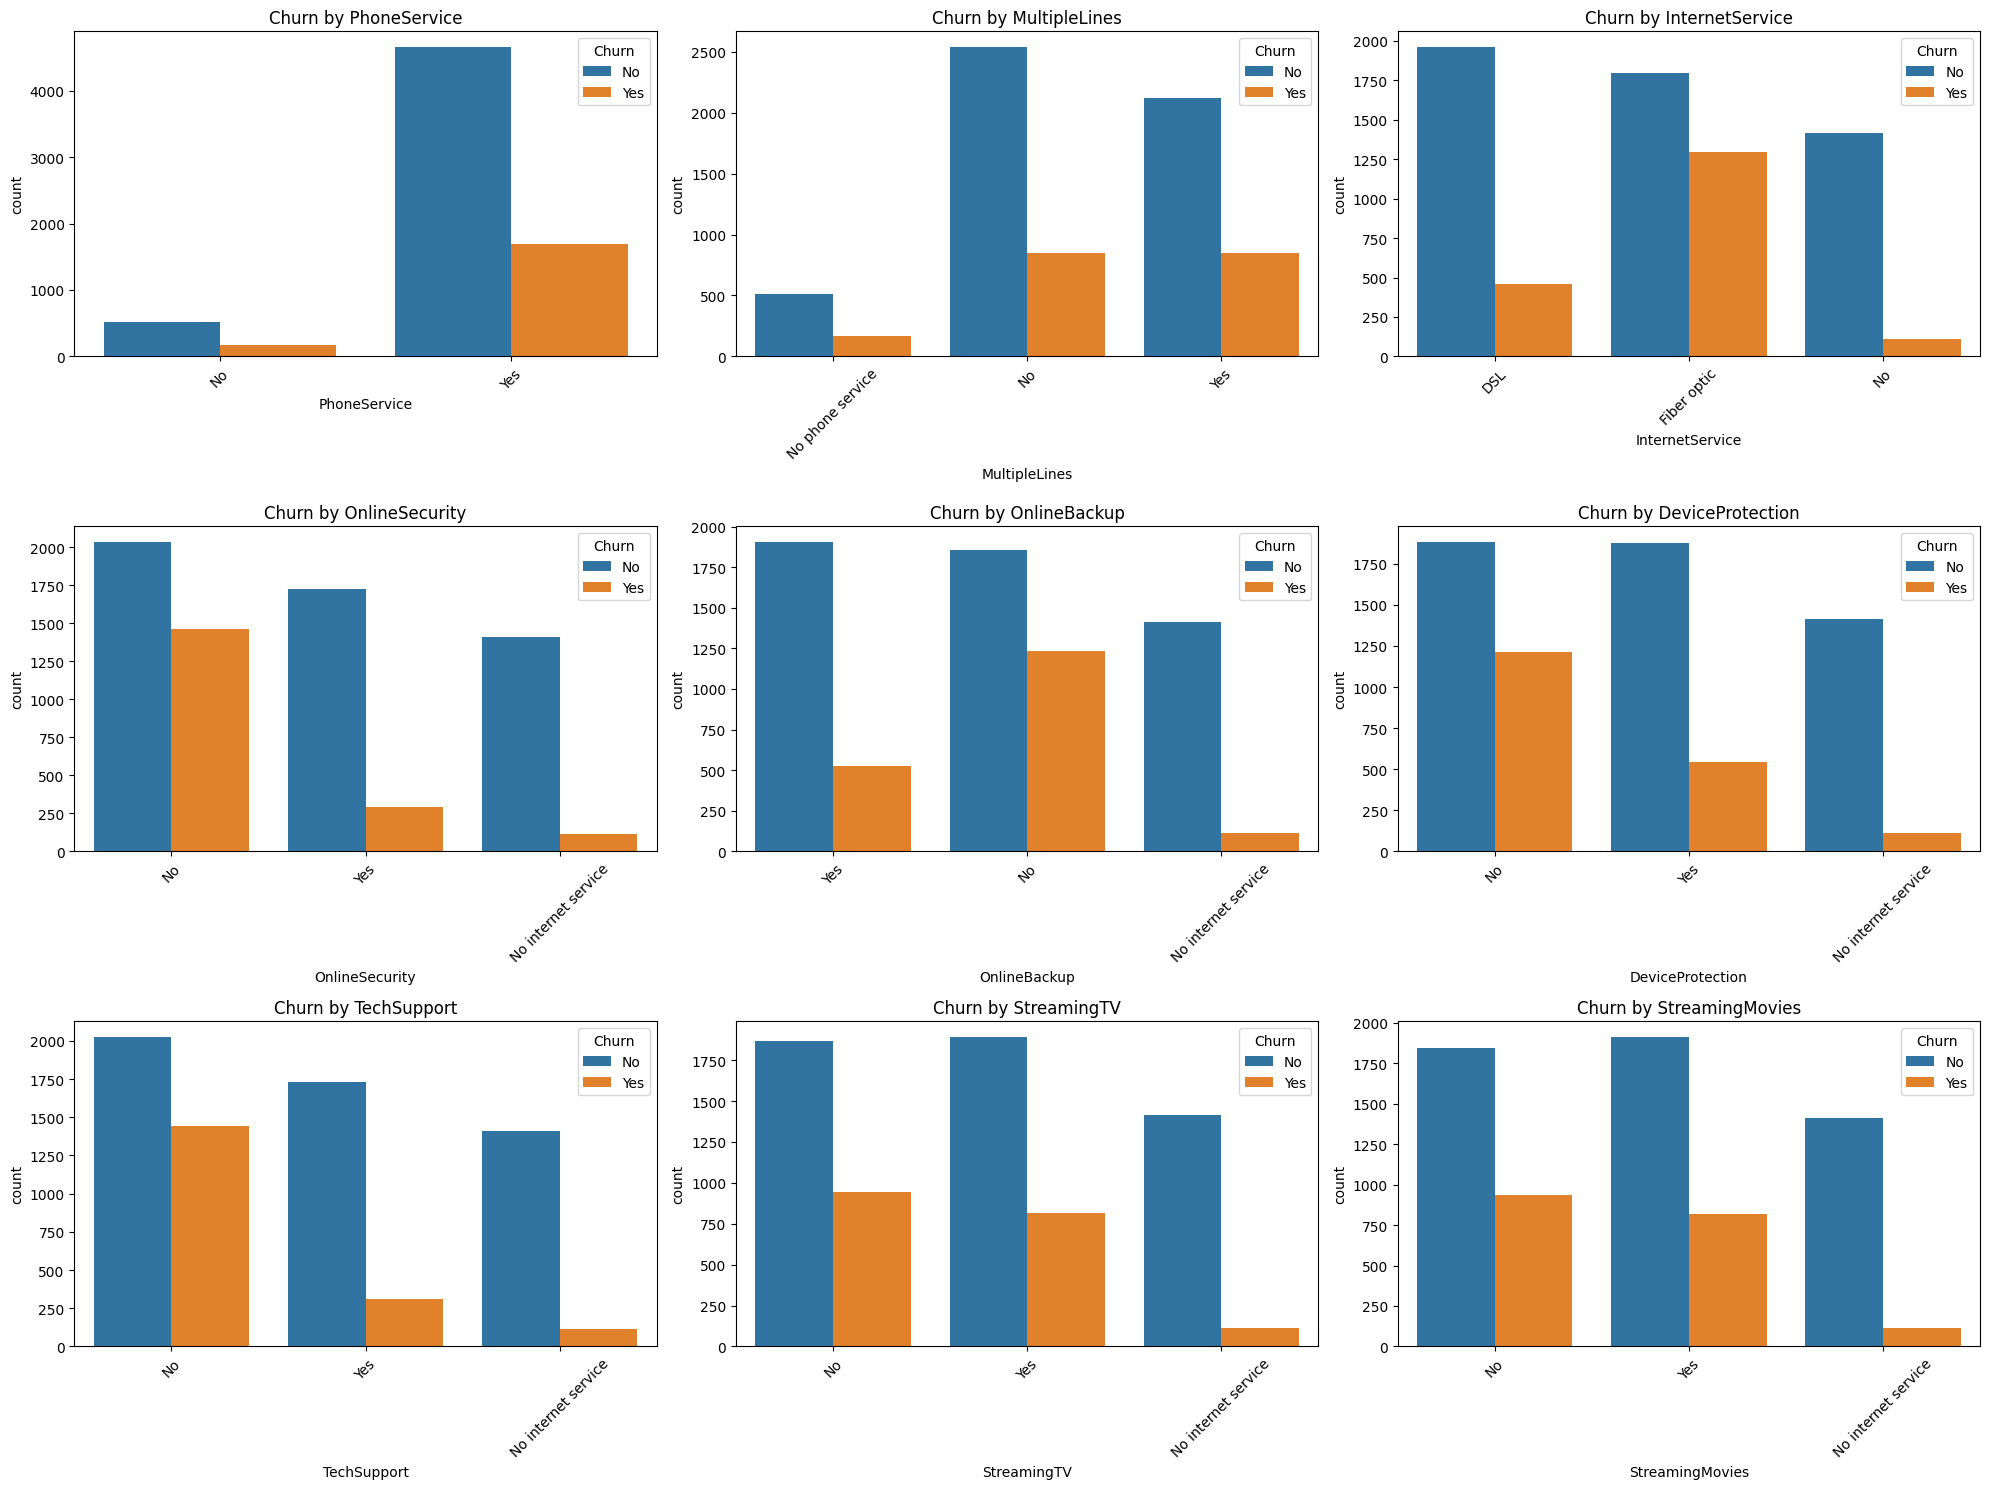

In [18]:
plt.figure(figsize=(20, 15))

services = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

for i, service in enumerate(services, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=service, hue='Churn')
    plt.title(f'Churn by {service}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

### 1. About 26.54% of customers have churned, with higher churn rates among senior citizens compared to non-seniors.
### 2. Customers with month-to-month contracts are more likely to churn compared to those with longer-term (1-2 year) contracts, and customers with shorter tenure (1-2 months) show higher churn rates.
### 3. For services, customers without online security, tech support, and device protection show higher churn rates, suggesting these services may help with customer retention.


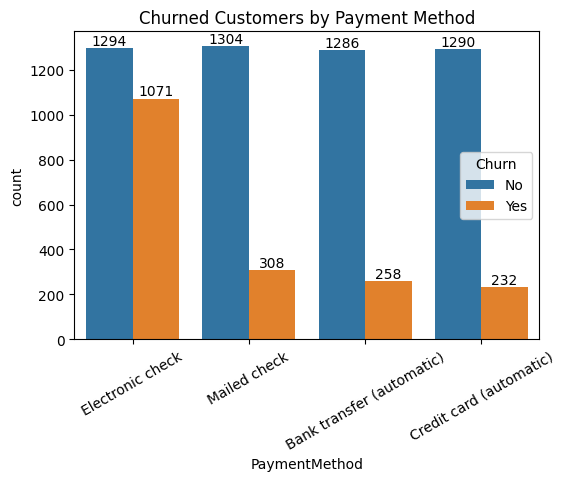

In [27]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=30) 
plt.title('Churned Customers by Payment Method')
plt.show()

### Customers is likely to churn when he is using electronic check as payment method.
